# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import cm, colors
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Persiapan Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/PROJECTS/DATASET/GlobalWeatherRepository.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97435 entries, 0 to 97434
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       97435 non-null  object 
 1   location_name                 97435 non-null  object 
 2   latitude                      97435 non-null  float64
 3   longitude                     97435 non-null  float64
 4   timezone                      97435 non-null  object 
 5   last_updated_epoch            97435 non-null  int64  
 6   last_updated                  97435 non-null  object 
 7   temperature_celsius           97435 non-null  float64
 8   temperature_fahrenheit        97435 non-null  float64
 9   condition_text                97435 non-null  object 
 10  wind_mph                      97435 non-null  float64
 11  wind_kph                      97435 non-null  float64
 12  wind_degree                   97435 non-null  int64  
 13  w

In [4]:
df.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,97435.000000,97435.000000,9.743500e+04,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,...,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000
mean,19.146115,22.112882,1.737542e+09,22.788837,73.021634,8.241385,13.266501,170.863827,1013.967650,29.941811,...,18.555623,517.522988,62.769735,15.819119,11.268231,26.167342,53.765763,1.760979,2.762200,49.699636
std,24.457297,65.819599,1.252229e+07,8.893859,16.008748,7.881144,12.681089,102.719479,11.381238,0.336032,...,14.682107,844.567024,32.260021,26.074344,40.805656,40.829209,164.167510,0.981699,2.567807,35.089898
min,-41.300000,-175.200000,1.715849e+09,-24.900000,-12.800000,2.200000,3.600000,1.000000,947.000000,27.960000,...,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.168000,-1848.150000,1.000000,1.000000,0.000000
25%,3.750000,-6.836100,1.726743e+09,18.100000,64.600000,4.000000,6.500000,83.000000,1010.000000,29.830000,...,10.500000,238.650000,42.000000,1.295000,0.800000,7.400000,10.900000,1.000000,1.000000,15.000000
50%,17.250000,23.316700,1.737541e+09,25.000000,77.000000,6.900000,11.200000,165.000000,1013.000000,29.920000,...,15.900000,327.450000,60.000000,4.995000,2.405000,15.170000,22.200000,1.000000,2.000000,50.000000
75%,40.400000,50.580000,1.748422e+09,28.300000,82.900000,11.400000,18.400000,256.000000,1017.500000,30.050000,...,24.400000,507.400000,79.000000,17.945000,9.065000,29.970000,46.065000,2.000000,3.000000,85.000000
max,64.150000,179.220000,1.759132e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,...,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000


In [5]:
df.isnull().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


In [6]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [7]:
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')
df['month'] = df['last_updated'].dt.month
df['month']

,month
0,5
1,5
2,5
3,5
4,5
...,...
97430,9
97431,9
97432,9
97433,9


In [8]:
df['hour'] = pd.to_datetime(df['last_updated'], errors='coerce').dt.hour
df['hour']

,hour
0,13
1,10
2,9
3,10
4,9
...,...
97430,3
97431,14
97432,10
97433,9


In [9]:
df = df.reset_index()
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['last_updated'] = df['last_updated'].dt.strftime('%d-%b-%Y')
print(df['last_updated'])

0        16-May-2024
1        16-May-2024
2        16-May-2024
3        16-May-2024
4        16-May-2024
            ...     
97430    29-Sep-2025
97431    29-Sep-2025
97432    29-Sep-2025
97433    29-Sep-2025
97434    29-Sep-2025
Name: last_updated, Length: 97435, dtype: object


In [10]:
df_real=df.copy()

In [11]:
df['region'] = df['timezone'].str.split('/').str[0]
df['country'] = df['timezone'].str.split('/').str[1]

df['region'] = df['timezone'].str.split('/').str[0].str.replace('_', ' ').str.title()
df['country']

,country
0,Kabul
1,Tirane
2,Algiers
3,Andorra
4,Luanda
...,...
97430,Caracas
97431,Bangkok
97432,Aden
97433,Lusaka


# 1. Distribusi Statistik

## a. Rata-rata,  minimum dan maksimum suhu, kelembapan, kecepatan angin, dll.

In [12]:
num_cols =  df_real.select_dtypes(include=[np.number]).columns

def p05(x): return x.quantile(0.05)
def p95(x): return x.quantile(0.95)
def iqr(x): return x.quantile(0.75) - x.quantile(0.25)

summary = df_real[num_cols].agg(['count','mean','median','std','min','max',p05,p95,iqr])
display(summary)

,index,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,...,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination,month,hour
count,97435.000000,97435.000000,97435.000000,9.743500e+04,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,...,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000,97435.000000
mean,48717.000000,19.146115,22.112882,1.737542e+09,22.788837,73.021634,8.241385,13.266501,170.863827,1013.967650,...,62.769735,15.819119,11.268231,26.167342,53.765763,1.760979,2.762200,49.699636,6.705670,11.765680
median,48717.000000,17.250000,23.316700,1.737541e+09,25.000000,77.000000,6.900000,11.200000,165.000000,1013.000000,...,60.000000,4.995000,2.405000,15.170000,22.200000,1.000000,2.000000,50.000000,7.000000,11.000000
std,28127.206076,24.457297,65.819599,1.252229e+07,8.893859,16.008748,7.881144,12.681089,102.719479,11.381238,...,32.260021,26.074344,40.805656,40.829209,164.167510,0.981699,2.567807,35.089898,3.037492,4.615569
min,0.000000,-41.300000,-175.200000,1.715849e+09,-24.900000,-12.800000,2.200000,3.600000,1.000000,947.000000,...,0.000000,0.000000,-9999.000000,0.168000,-1848.150000,1.000000,1.000000,0.000000,1.000000,0.000000
max,97434.000000,64.150000,179.220000,1.759132e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,...,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000,12.000000,23.000000
p05,4871.700000,-24.646400,-84.166700,1.717942e+09,5.200000,41.400000,2.200000,3.600000,16.000000,1003.000000,...,16.000000,0.185000,0.185000,1.700000,2.800000,1.000000,1.000000,1.000000,1.000000,4.000000
p95,92562.300000,53.900000,147.190000,1.757058e+09,35.000000,95.000000,18.300000,29.500000,340.000000,1026.000000,...,118.700000,71.040000,57.200000,84.175000,174.455000,4.000000,10.000000,99.000000,12.000000,20.000000
iqr,48717.000000,36.650000,57.416100,2.167920e+07,10.200000,18.300000,7.400000,11.900000,173.000000,7.500000,...,37.000000,16.650000,8.265000,22.570000,35.165000,1.000000,2.000000,70.000000,4.000000,5.000000


In [13]:
by_region = (df_real
             .groupby(df['region'])[num_cols]
             .agg(['count','mean','median','std','min','max',p05,p95])
             .sort_values(('temperature_celsius','mean')))
display(by_region.head(10))

index                                                           \
           count          mean   median           std min    max      p05   
region                                                                      
Australia    501  48589.776447  48534.0  28136.078561   8  97248  5071.00   
Atlantic    1001  48571.452547  48555.0  28119.286627  29  97316  4897.00   
Europe     23088  48709.880544  48672.0  28191.437419   1  97425  4793.70   
America    17409  48728.677236  48867.0  28180.315589   5  97430  4844.00   
Pacific     6001  48732.923179  48702.0  28125.017475  58  97429  4926.00   
Asia       23926  48724.873192  48698.0  28042.617858   0  97432  4973.25   
Africa     22551  48787.309388  48768.0  28155.927138   2  97434  4894.50   
Indian      2958  48142.639283  48047.5  27806.755699  28  97394  4781.25   

                    latitude             ... month         hour             \
                p95    count       mean  ...   p05   p95  count       mean   
region                                   ...                                 
Australia  92375.00      501 -35.287454  ...   1.0  12.0    501  18.736527   
Atlantic   92396.00     1001  39.172451  ...   1.0  12.0   1001   9.347652   
Europe     92651.50    23088  47.817656  ...   1.0  12.0  23088  11.788072   
America    92577.80    17409   7.755273  ...   1.0  12.0  17409   5.341433   
Pacific    92548.00     6001  -9.920689  ...   1.0  12.0   6001  17.078320   
Asia       92476.75    23926  26.296358  ...   1.0  12.0  23926  15.303394   
Africa     92631.50    22551   3.144060  ...   1.0  12.0  22551  11.254002   
Indian     91688.45     2958 -12.032057  ...   1.0  12.0   2958  13.545639   

                                                
          median       std min max   p05   p95  
region                                          
Australia   20.0  4.969753   0  23   0.0  23.0  
Atlantic     9.0  1.928994   6  16   7.0  13.0  
Europe      11.0  2.043810   8  19  10.0  16.0  
America      5.0  2.135067   0  13   2.0   9.0  
Pacific     20.0  7.692802   0  23   0.0  23.0  
Asia        15.0  2.763931   0  23  11.0  20.0  
Africa      11.0  2.122011   7  19   8.0  15.0  
Indian      13.0  1.984497  10  21  11.0  17.0  

[8 rows x 264 columns]

## b. Cuaca yang Paling Sering Muncul Per Region

In [14]:
most_common = (df.dropna(subset=['region','condition_text'])
  .groupby(['region','condition_text']).size()
  .rename('count').reset_index())

top = most_common.loc[most_common.groupby('region')['count'].idxmax()].reset_index(drop=True).sort_values('region')

display(top)

,region,condition_text,count
0,Africa,Sunny,9054
1,America,Partly cloudy,5343
2,Asia,Sunny,9439
3,Atlantic,Partly cloudy,469
4,Australia,Clear,260
5,Europe,Sunny,9387
6,Indian,Partly cloudy,906
7,Pacific,Partly cloudy,2890


/tmp/ipython-input-1280131942.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('YlOrRd', len(uconds))


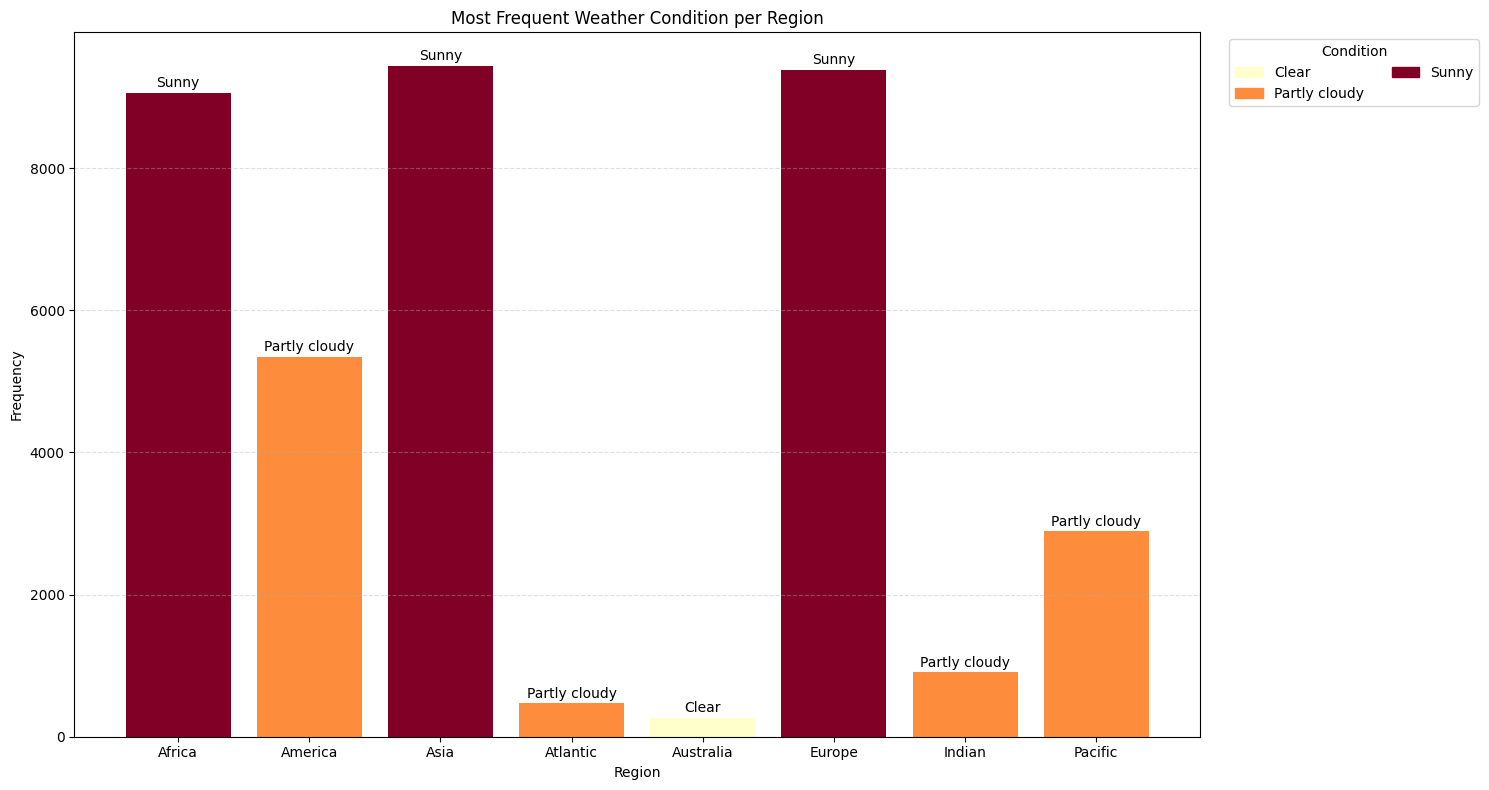

In [15]:
regions = top['region'].astype(str).values
counts  = top['count'].values
conds   = top['condition_text'].astype(str).values

uconds = np.unique(conds)
cmap = plt.cm.get_cmap('YlOrRd', len(uconds))
color_map = {c: cmap(i) for i, c in enumerate(uconds)}
bar_colors = [color_map[c] for c in conds]

fig, ax = plt.subplots(figsize=(15, 8))
bars = ax.bar(regions, counts, color=bar_colors, label=None)

ax.bar_label(bars, labels=conds, padding=2)
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

ax.set_xlabel('Region')
ax.set_ylabel('Frequency')
ax.set_title('Most Frequent Weather Condition per Region')

handles = [Patch(color=color_map[c], label=c) for c in uconds]
ax.legend(handles=handles, title='Condition', ncols=2, bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


# 2. Perbandingan Antar Wilayah

## a. Rata-rata Suhu Antar Region

In [16]:
df_real['region']= df_real['timezone'].str.split('/').str[0]
df_real['region']

,region
0,Asia
1,Europe
2,Africa
3,Europe
4,Africa
...,...
97430,America
97431,Asia
97432,Asia
97433,Africa


In [17]:
avg_temp_celcius = df_real.groupby(df_real['timezone'].str.split('/').str[0])['temperature_celsius'].mean().reset_index()

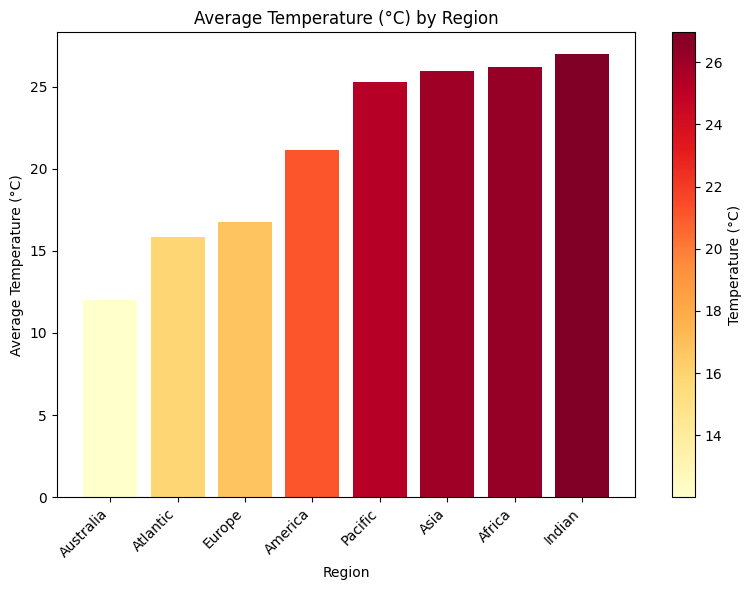

In [18]:
vals = avg_temp_celcius.sort_values('temperature_celsius')
x = vals['timezone'].to_numpy()
y = vals['temperature_celsius'].to_numpy()

if y.min() < 0 and y.max() > 0:
    norm = mpl.colors.TwoSlopeNorm(vmin=y.min(), vcenter=0, vmax=y.max())
    cmap = mpl.colormaps['coolwarm']
else:
    norm = mpl.colors.Normalize(vmin=y.min(), vmax=y.max())
    cmap = mpl.colormaps['YlOrRd']
bar_colors = cmap(norm(y))

fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(x, y, color=bar_colors)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Region')
ax.set_ylabel('Average Temperature (°C)')
ax.set_title('Average Temperature (°C) by Region')

sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Temperature (°C)')

plt.tight_layout()
plt.show()

## b. Identifikasi Wilayah dengan Suhu Ter-ekstrem

In [19]:
idx_min = df.groupby('region')['temperature_celsius'].idxmin()
idx_max = df.groupby('region')['temperature_celsius'].idxmax()

min_rows = (df.loc[idx_min, ['region','temperature_celsius','timezone','country']]
              .rename(columns={
                  'temperature_celsius':'min_temp',
                  'timezone':'min_timezone',
                  'country':'min_country'
              }))

max_rows = (df.loc[idx_max, ['region','temperature_celsius','timezone','country']]
              .rename(columns={
                  'temperature_celsius':'max_temp',
                  'timezone':'max_timezone',
                  'country':'max_country'
              }))

extreme_by_region = (min_rows.reset_index(drop=True)
                               .merge(max_rows.reset_index(drop=True), on='region'))

display(extreme_by_region.sort_values('region'))

,region,min_temp,min_timezone,min_country,max_temp,max_timezone,max_country
0,Africa,3.4,Africa/Johannesburg,Johannesburg,47.1,Africa/Djibouti,Djibouti
1,America,-21.8,America/Toronto,Toronto,35.3,America/Dominica,Dominica
2,Asia,-24.9,Asia/Ulaanbaatar,Ulaanbaatar,49.2,Asia/Kuwait,Kuwait
3,Atlantic,-5.7,Atlantic/Reykjavik,Reykjavik,31.3,Atlantic/Cape_Verde,Cape_Verde
4,Australia,-3.7,Australia/Sydney,Sydney,28.2,Australia/Sydney,Sydney
5,Europe,-11.8,Europe/Oslo,Oslo,41.4,Europe/Skopje,Skopje
6,Indian,12.0,Indian/Antananarivo,Antananarivo,41.4,Indian/Antananarivo,Antananarivo
7,Pacific,5.1,Pacific/Auckland,Auckland,32.1,Pacific/Pohnpei,Pohnpei


/tmp/ipython-input-1428837772.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


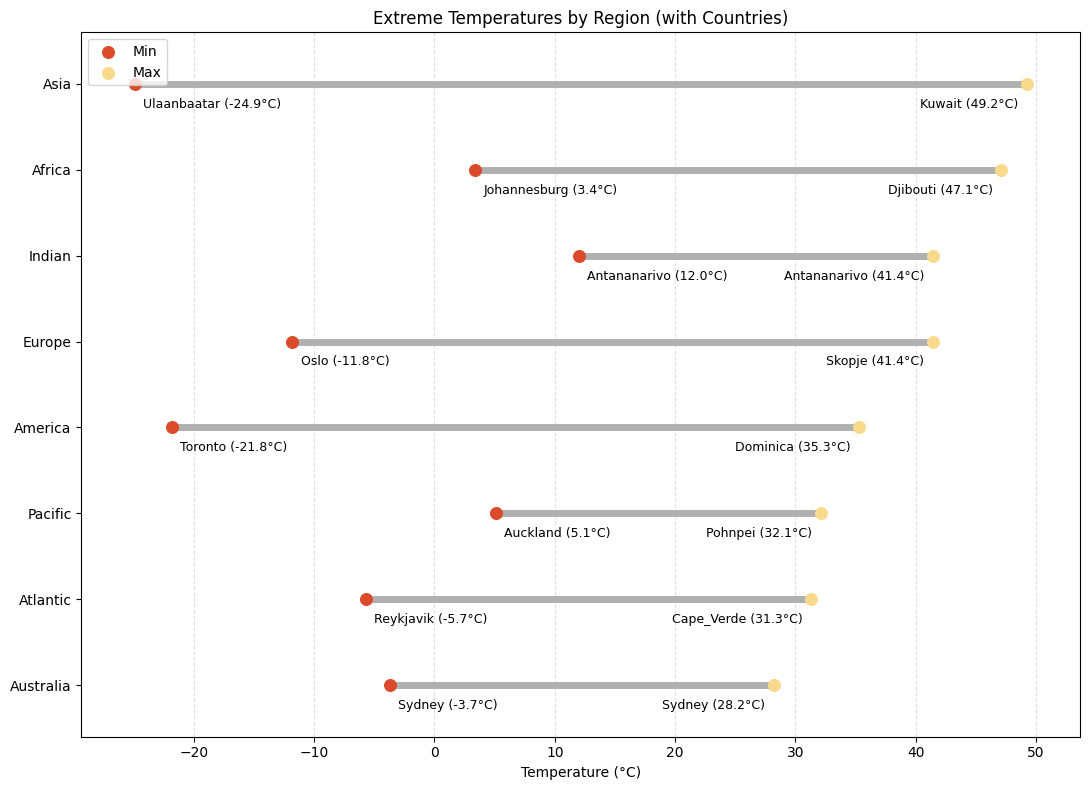

In [36]:
import numpy as np
import matplotlib.pyplot as plt


ext = extreme_by_region.sort_values('max_temp').reset_index(drop=True)

regions = ext['region'].to_numpy()
tmin    = ext['min_temp'].to_numpy()
tmax    = ext['max_temp'].to_numpy()
cmin    = ext['min_country'].astype(str).to_numpy()
cmax    = ext['max_country'].astype(str).to_numpy()

y = np.arange(len(ext))
pad = (tmax.max() - tmin.min()) * 0.04 if len(ext) else 1.0

fig, ax = plt.subplots(figsize=(11, 8), constrained_layout=True)

ax.hlines(y, tmin, tmax, color='#B0B0B0', linewidth=5, zorder=1)

ax.scatter(tmin, y, color='#db4a2b', s=70, label='Min', zorder=2)
ax.scatter(tmax, y, color='#f9da8c', s=70, label='Max', zorder=2)

xpad = (tmax.max() - tmin.min()) * 0.06
ax.set_xlim(tmin.min() - xpad, tmax.max() + xpad)

gap = (y[1] - y[0]) if len(y) > 1 else 1.0
ax.set_ylim(y.min() - 0.5*gap, y.max() + 0.5*gap)

for i in range(len(ext)):
    ax.annotate(f"{cmin[i]} ({tmin[i]:.1f}°C)", (tmin[i], y[i]),
                xytext=(+6, -10), textcoords='offset points',
                ha='left',  va='top', fontsize=9, color='black', clip_on=False)

    ax.annotate(f"{cmax[i]} ({tmax[i]:.1f}°C)", (tmax[i], y[i]),
                xytext=(-6, -10), textcoords='offset points',
                ha='right', va='top', fontsize=9, color='black', clip_on=False)

ax.set_yticks(y)
ax.set_yticklabels(regions)
ax.set_xlabel('Temperature (°C)')
ax.set_title('Extreme Temperatures by Region (with Countries)')
ax.xaxis.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='upper left')

gap = (y[1] - y[0]) if len(y) > 1 else 1.0
ax.set_ylim(y.min() - 0.6*gap, y.max() + 0.6*gap)

plt.tight_layout()
plt.show()

# 3. Perbandingan Temperature Asli dengan Temperature 'Feels Like'

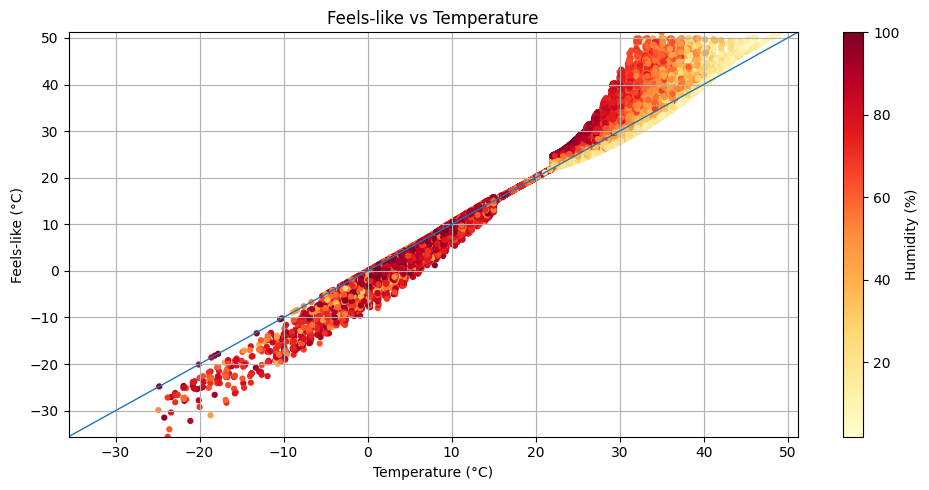

In [21]:
temp = df['temperature_celsius']
feel = df['feels_like_celsius']
m = temp.notna() & feel.notna()

plt.figure(figsize=(10,5))
plt.scatter(temp[m], feel[m], s=12, c=df.loc[m,'humidity'], cmap='YlOrRd')
plt.colorbar(label='Humidity (%)')
lo = np.nanmin([temp[m].min(), feel[m].min()])
hi = np.nanmax([temp[m].max(), feel[m].max()])
plt.plot([lo, hi], [lo, hi], lw=1)
plt.xlim(lo, hi); plt.ylim(lo, hi)
plt.xlabel('Temperature (°C)')
plt.ylabel('Feels-like (°C)')
plt.title('Feels-like vs Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()


# 4. Clustering Negara dengan Iklim/Cuaca yang Mirip

In [22]:
feat = [c for c in [
    'temperature_celsius','humidity','precip_mm','wind_kph','pressure_mb',
    'uv_index','gust_kph','air_quality_PM2.5'
] if c in df.columns]

G = (df.groupby('country')[feat]
       .mean()
       .dropna())

for col in ['precip_mm','air_quality_PM2.5']:
    if col in G.columns:
        G[col] = np.log1p(G[col])

scaler = StandardScaler()
X = scaler.fit_transform(G[feat])

scores = {}
for k in range(2, min(9, len(G))):
    km_tmp = KMeans(n_clusters=k, n_init='auto', random_state=42).fit(X)
    scores[k] = silhouette_score(X, km_tmp.labels_)

best_k = max(scores, key=scores.get)
print("Silhouette per K:", {k: round(v,3) for k,v in scores.items()}, "→ best_k =", best_k)

Silhouette per K: {2: np.float64(0.194), 3: np.float64(0.214), 4: np.float64(0.24), 5: np.float64(0.186), 6: np.float64(0.226), 7: np.float64(0.202), 8: np.float64(0.216)} → best_k = 4


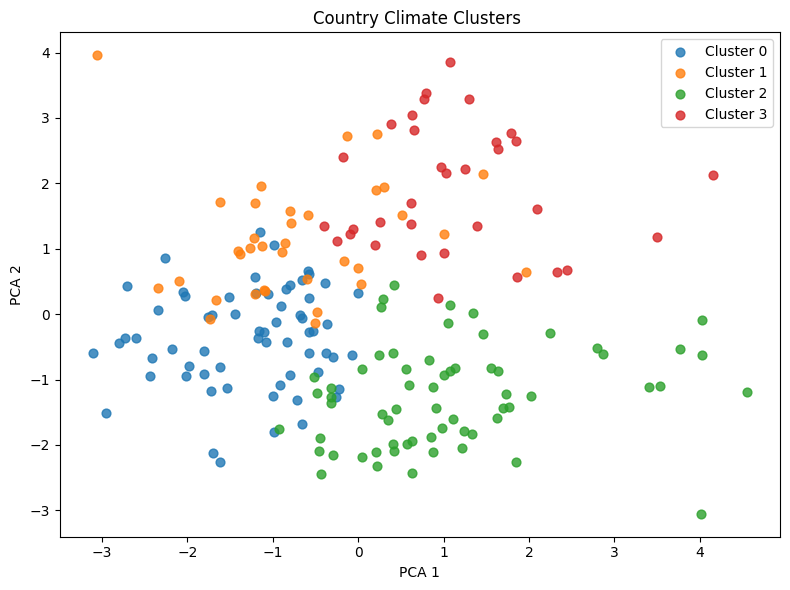


Cluster 0:
Abidjan, Algiers, Almaty, Amsterdam, Andorra, Argentina, Asuncion, Belgrade, Berlin, Bogota

Cluster 1:
Bangkok, Belize, Bissau, Brunei, Colombo, Conakry, Dhaka, Dili, El_Salvador, Fiji

Cluster 2:
Accra, Addis_Ababa, Aden, Amman, Antananarivo, Ashgabat, Asmara, Athens, Baghdad, Bahrain

Cluster 3:
Antigua, Apia, Auckland, Baku, Banjul, Barbados, Cape_Verde, Copenhagen, Dakar, Dominica


In [23]:
feat = [c for c in [
    'temperature_celsius','humidity','precip_mm','wind_kph','pressure_mb','uv_index', 'gust_kph', 'air_quality_PM2.5'] if c in df.columns]

G = (df.groupby('country')[feat]
       .mean()
       .dropna())

X = StandardScaler().fit_transform(G)
k  = 4
km = KMeans(n_clusters=k, n_init='auto', random_state=42)
labels = km.fit_predict(X)
G['cluster'] = labels

Z = PCA(n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(8,6))
for c in sorted(G['cluster'].unique()):
    idx = (labels == c)
    plt.scatter(Z[idx,0], Z[idx,1], s=40, alpha=0.8, label=f'Cluster {c}')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.title('Country Climate Clusters ')
plt.legend()
plt.tight_layout(); plt.show()

for c in sorted(G['cluster'].unique()):
    print(f"\nCluster {c}:")
    print(", ".join(G.index[labels==c][:10]))


# 5. UV Index

## a. Rata-rata UV Index tiap Bulan

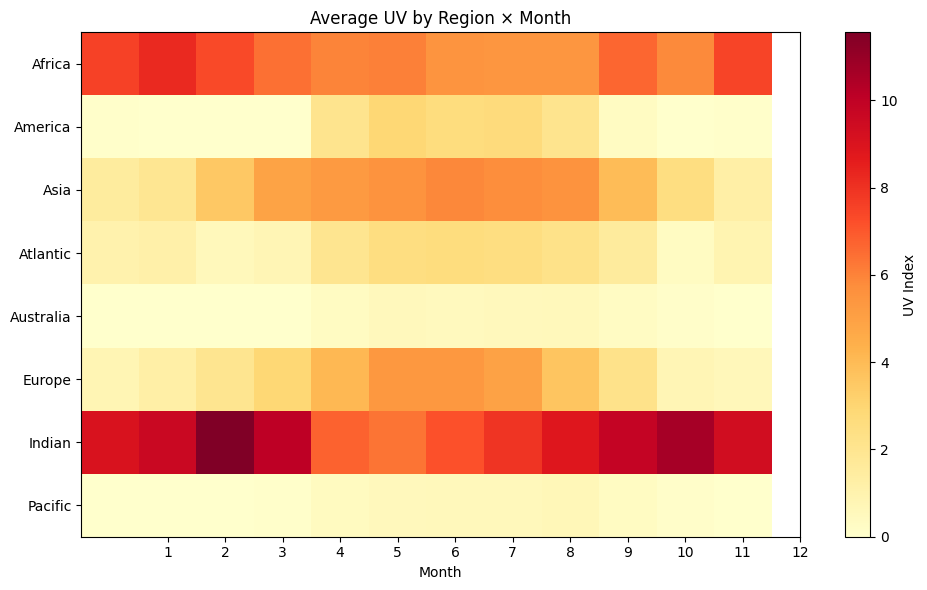

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tab = (df.dropna(subset=['region','month','uv_index'])
         .pivot_table(index='region', columns='month', values='uv_index', aggfunc='mean'))

fig, ax = plt.subplots(figsize=(10, 0.5*len(tab.index)+2))
vmin, vmax = np.nanmin(tab.values), np.nanmax(tab.values)
im = ax.imshow(tab.values, aspect='auto',
               cmap=plt.colormaps['YlOrRd'], vmin=vmin, vmax=vmax)
ax.set_yticks(np.arange(len(tab.index))); ax.set_yticklabels(tab.index)
ax.set_xticks(np.arange(1,13)); ax.set_xticklabels(range(1,13))
ax.set_xlabel('Month'); ax.set_title('Average UV by Region × Month')
cbar = plt.colorbar(im, ax=ax); cbar.set_label('UV Index')
plt.tight_layout(); plt.show()

## b. Risiko kesehatan (kategori WHO) + stacked bar per region

Kategori WHO: 0–2 Low, 3–5 Moderate, 6–7 High, 8–10 Very High, ≥11 Extreme.

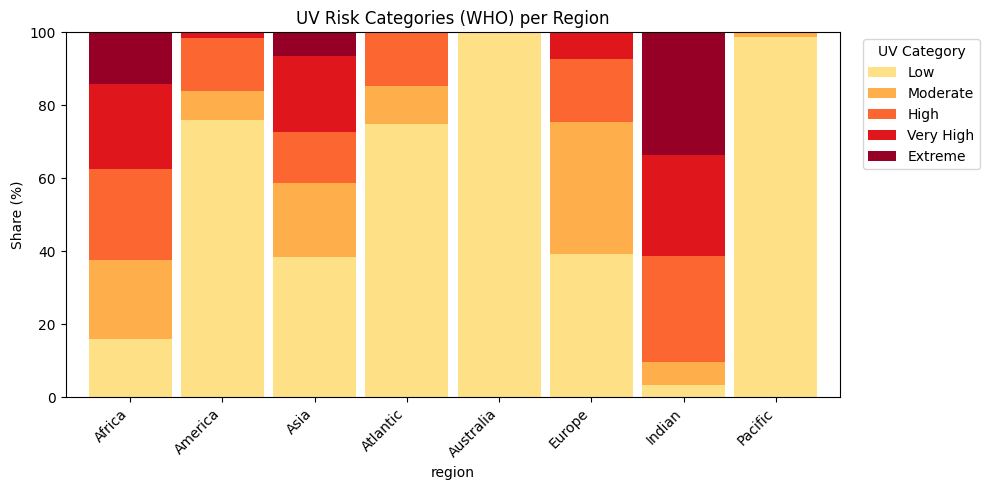

In [33]:
share = (df.dropna(subset=['region','uv_cat'])
           .groupby('region')['uv_cat']
           .value_counts(normalize=True)
           .rename('share').reset_index())

order = ['Low','Moderate','High','Very High','Extreme']
wide = (share.pivot(index='region', columns='uv_cat', values='share')
             .reindex(columns=order).fillna(0)
             .sort_index())

cmap = plt.colormaps['YlOrRd']
colors = [cmap(v) for v in np.linspace(0.2, 0.95, len(order))]

ax = wide.mul(100).plot(kind='bar', stacked=True, figsize=(10,5), width=0.9, color=colors)
ax.set_ylim(0, 100)
ax.set_ylabel('Share (%)')
ax.set_title('UV Risk Categories (WHO) per Region')
ax.legend(title='UV Category', bbox_to_anchor=(1.02,1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()